In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Unzipping the compressed file
file_path = '/content/Node_3_anon_gic_qdc_median_wdy10_wmin1800_fm3_wgic.csv.gz'
data = pd.read_csv(file_path, compression='gzip')

# Show the first few rows of the dataframe
print(data.head())

# Summary statistics, to get a quick overview of the data
print(data.describe())


              DateTime   GIC  GIC_QDC  IQR
0  2018-01-01/00:00:00  0.03      NaN  NaN
1  2018-01-01/00:00:01  0.04      NaN  NaN
2  2018-01-01/00:00:02  0.09      NaN  NaN
3  2018-01-01/00:00:03  0.09      NaN  NaN
4  2018-01-01/00:00:04  0.09      NaN  NaN
                GIC       GIC_QDC           IQR
count  3.148533e+07  3.019873e+07  3.019873e+07
mean  -1.805374e-04  5.608686e-04  1.026976e-01
std    1.480023e-01  8.800756e-02  4.824713e-02
min   -2.169000e+01 -4.400000e-01  4.000000e-02
25%   -6.000000e-02 -2.860000e-02  7.000000e-02
50%    1.000000e-02  2.740000e-02  8.840000e-02
75%    8.000000e-02  5.310000e-02  1.258000e-01
max    3.355000e+01  2.000000e-01  4.000000e-01


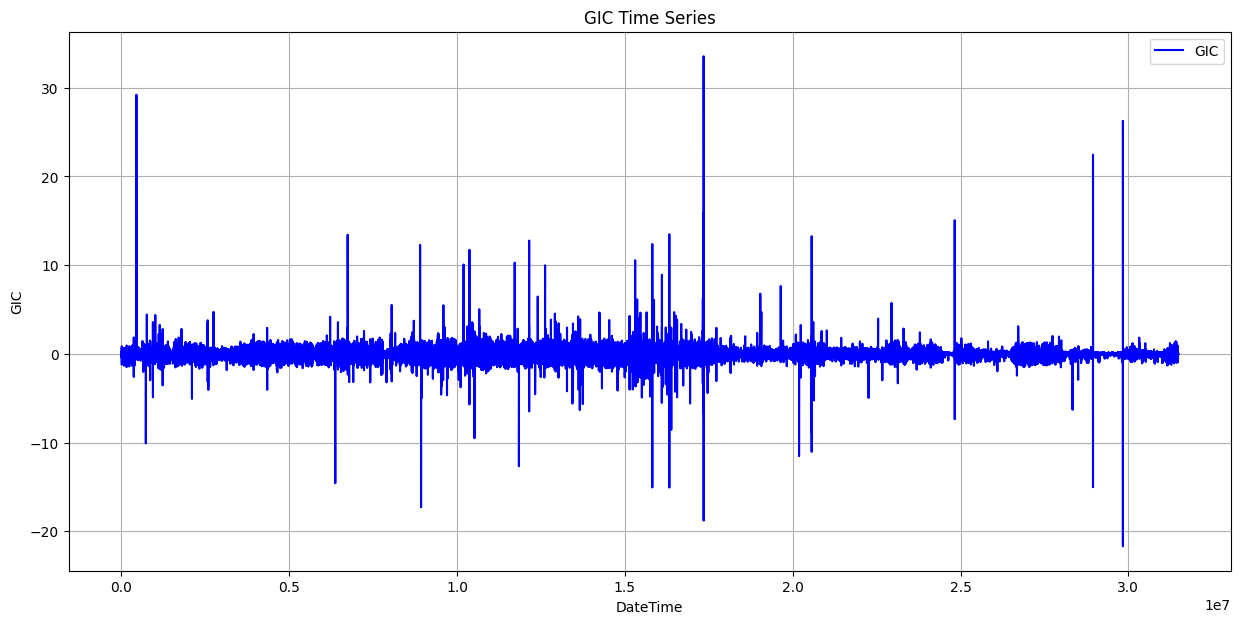

In [ ]:
# # Convert the 'DateTime' column to datetime
# data['DateTime'] = pd.to_datetime(data['DateTime']) #, format='%Y-%m-%d/%H:%M:%S')
# # Set 'DateTime' as the index of the dataframe
# data.set_index('DateTime', inplace=True)
# Plotting
plt.figure(figsize=(15, 7))  # Set the figure size for better readability
plt.plot(data['GIC'], label='GIC', color='blue')  # Plot the GIC column
plt.title('GIC Time Series')
plt.xlabel('DateTime')
plt.ylabel('GIC')
plt.legend()
plt.grid(True)
plt.show()

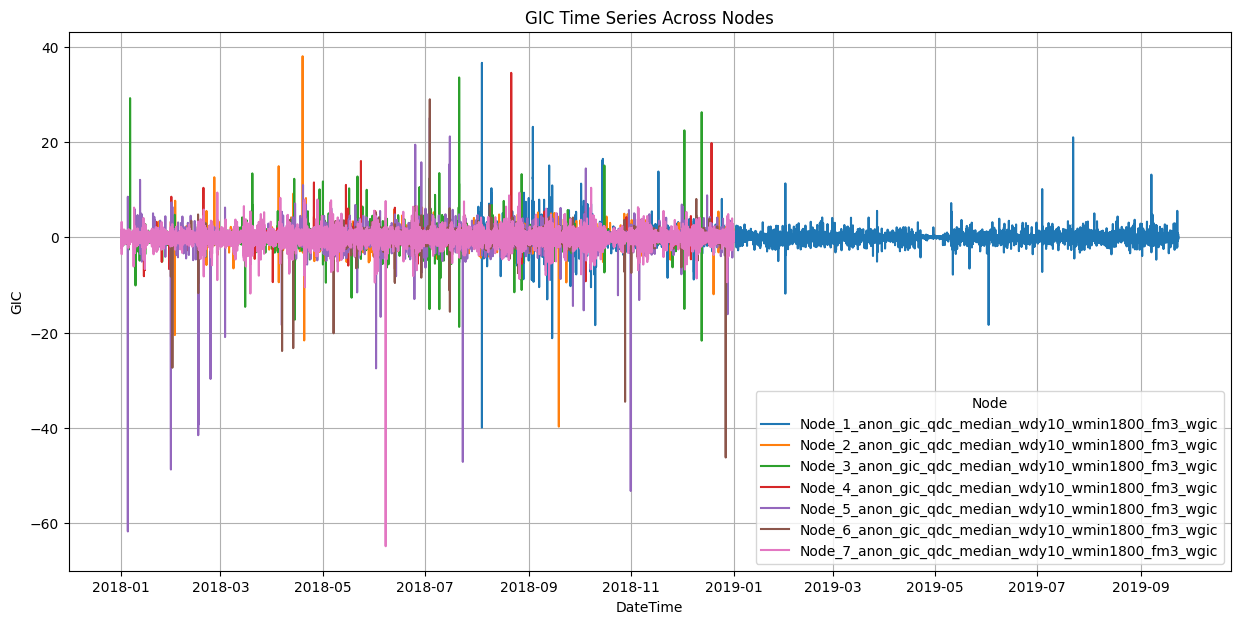

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the base path and file names
base_path = '/content/'
file_names = [f"Node_{i}_anon_gic_qdc_median_wdy10_wmin1800_fm3_wgic.csv.gz" for i in range(1, 8)]

# Initialize the plot
plt.figure(figsize=(15, 7))

# Loop through each file, load the data, and plot
for file_name in file_names:
    file_path = f"{base_path}{file_name}"
    data = pd.read_csv(file_path, compression='gzip')

    # Convert 'DateTime' column to datetime type if not done within the CSV
    # data['DateTime'] = pd.to_datetime(data['DateTime'], format='%Y-%m-%d/%H:%M:%S')
    # data.set_index('DateTime', inplace=True)

    # Plotting each dataset
    plt.plot(data['GIC'], label=file_name.split('.')[0])  # Use the filename as label, trimming the extension

# Configure the plot with titles and labels
plt.title('GIC Time Series Across Nodes')
plt.xlabel('DateTime')
plt.ylabel('GIC')
plt.legend(title='Node')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# Define the base path and file names
base_path = '/content/'
file_names = [f"Node_{i}_anon_gic_qdc_median_wdy10_wmin1800_fm3_wgic.csv.gz" for i in range(2, 8)]

# List to store each processed DataFrame
filtered_data_frames = []

# Loop through each file, process the data, and collect it
for file_name in file_names:
    file_path = f"{base_path}{file_name}"
    data = pd.read_csv(file_path, compression='gzip')

    # Make all GIC values positive
    data['GIC'] = data['GIC'].abs()

    # Filter rows where GIC is greater than 5
    filtered_data = data[data['GIC'] > 5]

    # Add a new column to indicate the source file
    filtered_data['Source'] = file_name

    # Append the filtered data to the list
    filtered_data_frames.append(filtered_data)

# Concatenate all the data frames into a single DataFrame
final_data = pd.concat(filtered_data_frames)

# Save the combined DataFrame to a new CSV file
final_data.to_csv('/content/thres_5_QDC.csv', index=False)

print("Data processing complete. Filtered data saved to '/content/thres_5_QDC.csv'.")


<ipython-input-2-c1b0a2005191>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Source'] = file_name
<ipython-input-2-c1b0a2005191>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Source'] = file_name
<ipython-input-2-c1b0a2005191>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

Data processing complete. Filtered data saved to '/content/thres_5_QDC.csv'.


<ipython-input-2-c1b0a2005191>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Source'] = file_name


In [ ]:
import pandas as pd
df = pd.read_csv('/content/thres_5_QDC.csv')

print("Original 'Source' data:")
print(df['Source'].head())

df['Source'] = df['Source'].str.extract('(Node_\d)')

print("\nModified 'Source' data:")
print(df['Source'].head())

df.to_csv('/content/thres_5_QDC_all_nodes.csv', index=False)

Original 'Source' data:
0    Node_2_anon_gic_qdc_median_wdy10_wmin1800_fm3_...
1    Node_2_anon_gic_qdc_median_wdy10_wmin1800_fm3_...
2    Node_2_anon_gic_qdc_median_wdy10_wmin1800_fm3_...
3    Node_2_anon_gic_qdc_median_wdy10_wmin1800_fm3_...
4    Node_2_anon_gic_qdc_median_wdy10_wmin1800_fm3_...
Name: Source, dtype: object

Modified 'Source' data:
0    Node_2
1    Node_2
2    Node_2
3    Node_2
4    Node_2
Name: Source, dtype: object


In [ ]:
import numpy as np
from scipy.stats import genextreme
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

In [ ]:
import pandas as pd
from scipy.stats import genextreme
import numpy as np

# Load the data
df = pd.read_csv('/content/thres_5_QDC_all_nodes.csv')

# List of nodes from Node_2 to Node_7 (assuming these are all present in the data)
nodes = ['Node_' + str(i) for i in range(2, 8)]

# Dictionary to store dataframes for each node
dfs = {}

# Loop through each node, filter the data, fit GEV, and calculate stats
for node in nodes:
    # Filter data for the current node
    node_df = df[df['Source'] == node]
    dfs[node] = node_df  # Store in dictionary if needed later

    # Fit GEV model to the 'GIC' values of the filtered dataframe
    if not node_df.empty:
        c, loc, scale = genextreme.fit(node_df['GIC'])

        # Calculate 1-10 year return levels
        T = 10
        return_levels_10 = genextreme.ppf(1 - 1/T, c, loc=loc, scale=scale)
        # Calculate 1-100 year return levels
        T = 100
        return_levels_100 = genextreme.ppf(1 - 1/T, c, loc=loc, scale=scale)
        # Output the desired statistics
        print(f"Node: {node}")
        print(f"Num of Data: {len(node_df)}")
        print(f"Max GIC: {node_df['GIC'].max()}, Min GIC: {node_df['GIC'].min()}")
        print(f"1-10 Year Return Levels: {return_levels_10}")
        print(f"1-100 Year Return Levels: {return_levels_100}")
        print('------------------------------------------------')
    else:
        print(f"No data for {node}")


Node: Node_2
Num of Data: 33
Max GIC: 39.73, Min GIC: 5.02
1-10 Year Return Levels: 29.845962599065686
1-100 Year Return Levels: 817.1322415555505
------------------------------------------------
Node: Node_3
Num of Data: 85
Max GIC: 33.55, Min GIC: 5.03
1-10 Year Return Levels: 19.57631339052641
1-100 Year Return Levels: 106.45332102870161
------------------------------------------------
Node: Node_4
Num of Data: 135
Max GIC: 34.52, Min GIC: 5.01
1-10 Year Return Levels: 6.959225278778364
1-100 Year Return Levels: 13.947880735629727
------------------------------------------------
Node: Node_5
Num of Data: 473
Max GIC: 61.73, Min GIC: 5.01
1-10 Year Return Levels: 26.876525690745616
1-100 Year Return Levels: 596.9616162454764
------------------------------------------------
Node: Node_6
Num of Data: 1589
Max GIC: 46.21, Min GIC: 5.01
1-10 Year Return Levels: 7.550151298802085
1-100 Year Return Levels: 12.698160071069065
------------------------------------------------
Node: Node_7
Num

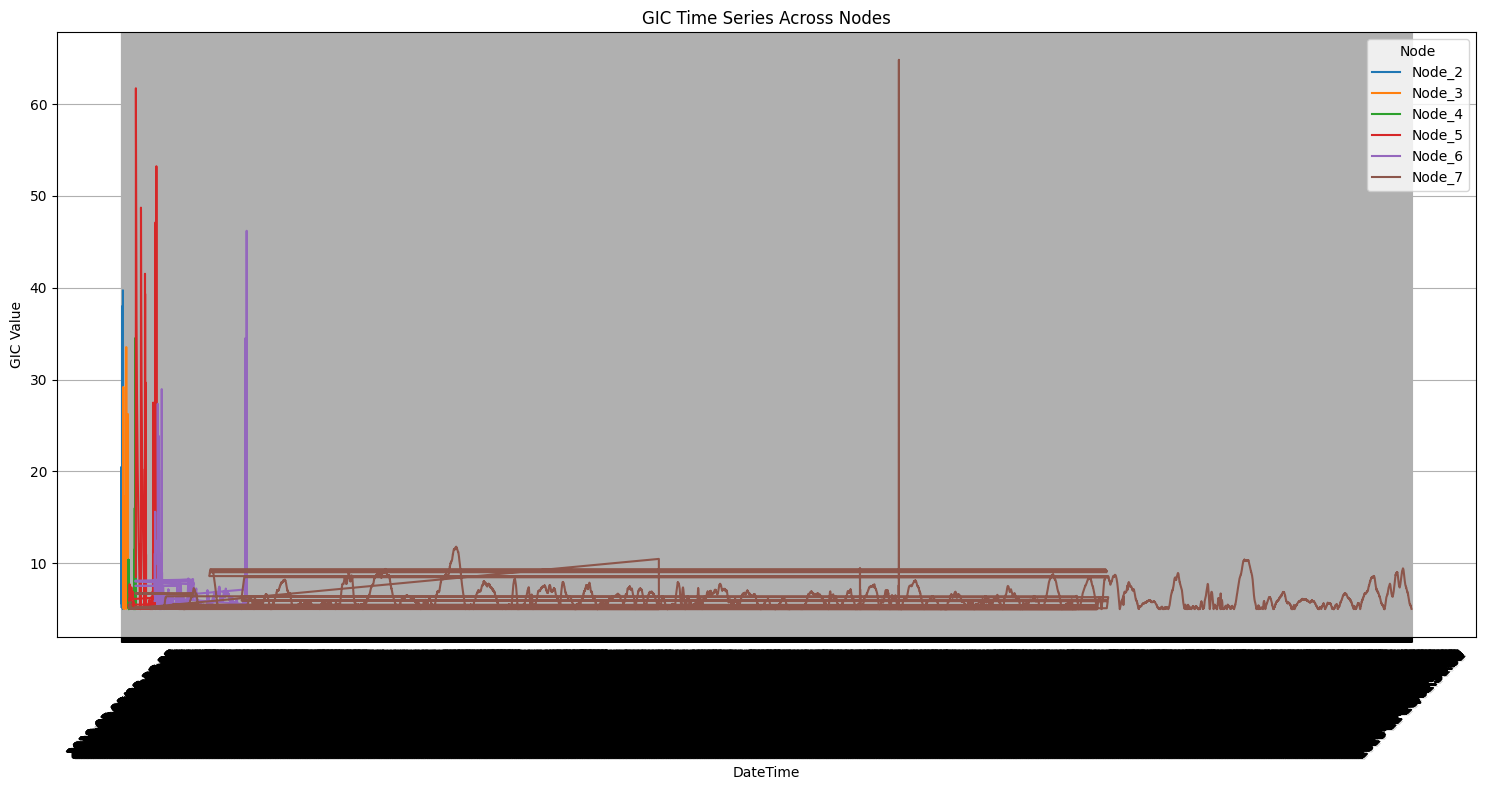

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/content/thres_5_QDC_all_nodes.csv')

# List of nodes from Node_2 to Node_7 (assuming these are all present in the data)
nodes = ['Node_' + str(i) for i in range(2, 8)]

# Initialize the plot
plt.figure(figsize=(15, 8))

# Loop through each node and plot the GIC values
for node in nodes:
    # Filter data for the current node
    node_df = df[df['Source'] == node]

    # Check if there is any data to plot
    if not node_df.empty:
        plt.plot(node_df['DateTime'], node_df['GIC'], label=node)
    else:
        print(f"No data available for {node}")

# Configure the plot with titles and labels
plt.title('GIC Time Series Across Nodes')
plt.xlabel('DateTime')
plt.ylabel('GIC Value')
plt.legend(title='Node')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to not cut off content
plt.show()


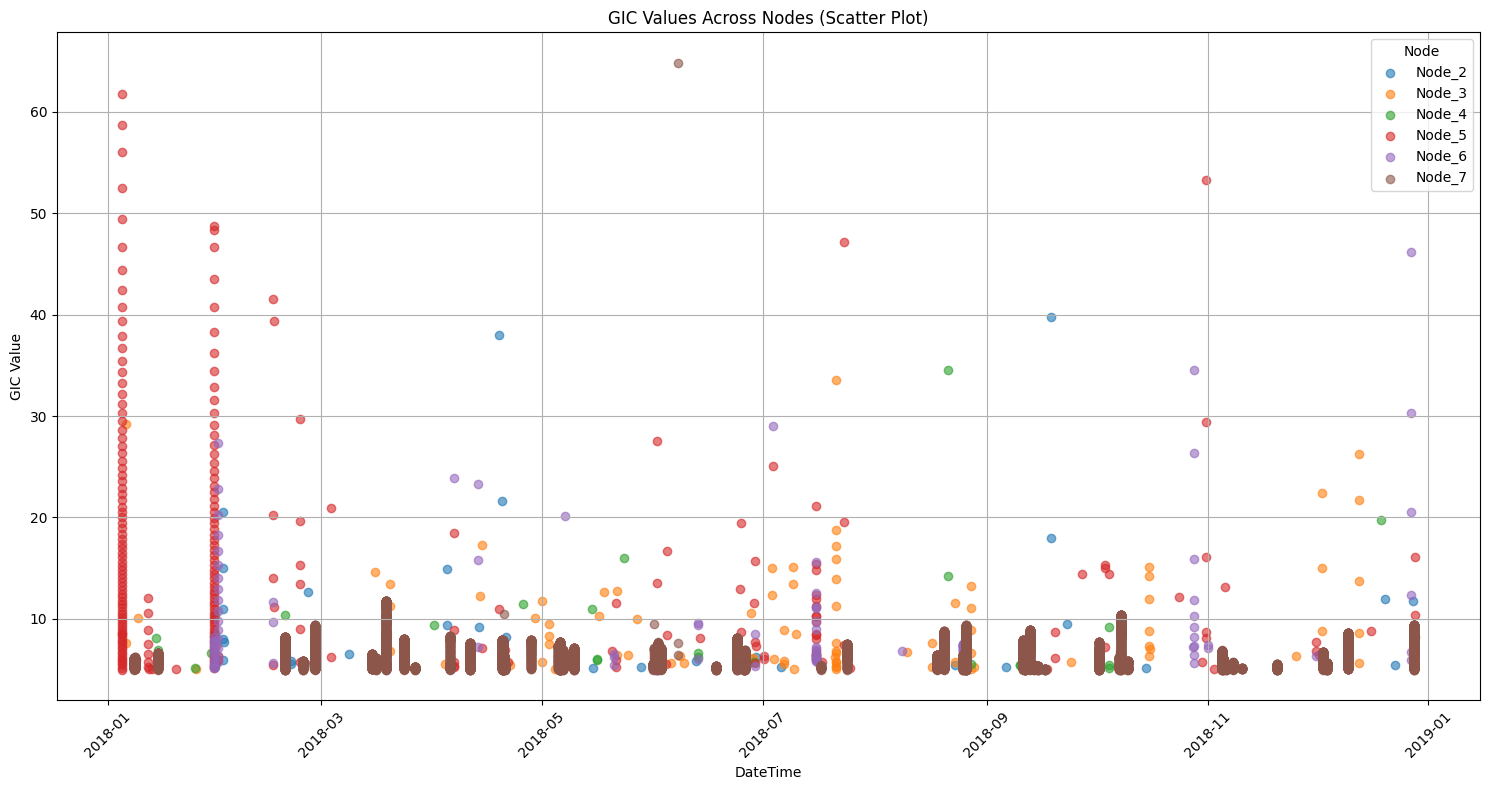

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/thres_5_QDC_all_nodes.csv')

# List of nodes from Node_2 to Node_7 (assuming these are all present in the data)
nodes = ['Node_' + str(i) for i in range(2, 8)]

# Convert 'DateTime' to datetime format for better x-axis handling
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d/%H:%M:%S')

# Initialize the plot
plt.figure(figsize=(15, 8))

# Loop through each node and plot the GIC values
for node in nodes:
    # Filter data for the current node
    node_df = df[df['Source'] == node]

    # Check if there is any data to plot
    if not node_df.empty:
        plt.scatter(node_df['DateTime'], node_df['GIC'], label=node, alpha=0.6)
    else:
        print(f"No data available for {node}")

# Configure the plot with titles and labels
plt.title('GIC Values Across Nodes (Scatter Plot)')
plt.xlabel('DateTime')
plt.ylabel('GIC Value')
plt.legend(title='Node')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjust layout to not cut off content
plt.show()


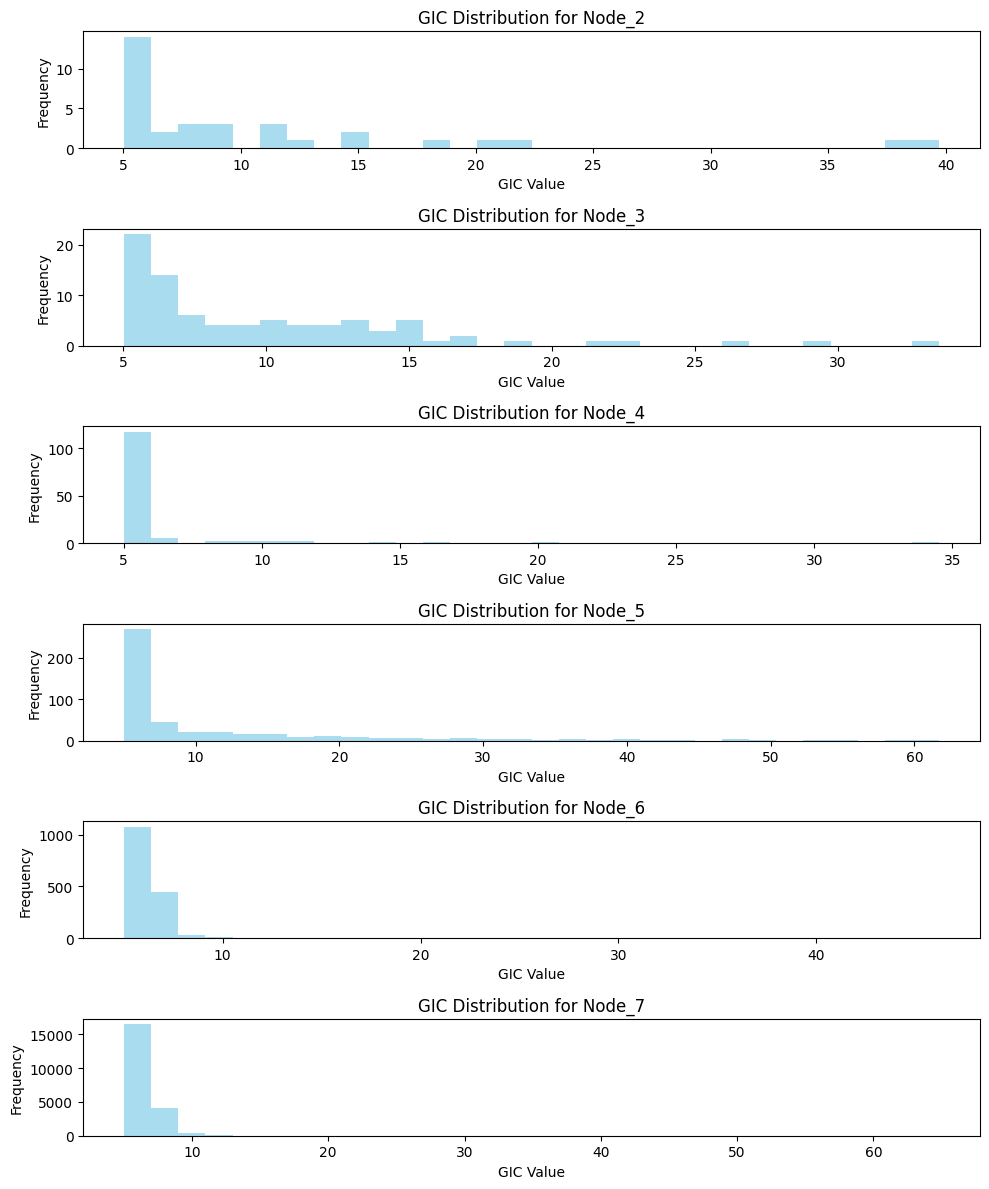

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/thres_5_QDC_all_nodes.csv')

# processing from node 2 to 7
nodes = ['Node_' + str(i) for i in range(2, 8)]

fig, axs = plt.subplots(len(nodes), 1, figsize=(10, 12))


for idx, node in enumerate(nodes):

    node_df = df[df['Source'] == node]

    if not node_df.empty:
        axs[idx].hist(node_df['GIC'], bins=30, color='skyblue', alpha=0.7)
        axs[idx].set_title(f'GIC Distribution for {node}')
        axs[idx].set_xlabel('GIC Value')
        axs[idx].set_ylabel('Frequency')
    else:
        print(f"No data available for {node}")

plt.tight_layout()
plt.show()
